# CRYPTO BOT

Disclaimer: This program is not intended as serious financial advice. If the program makes a suggestion, you should ALWAYS do your research and make your own informed decisions. Beware, sometimes the best predictions are Elon Musk's tweets :P

This program allows users to select one of their favorite cryptocurrencies and obtain the most up-to-date value in the market. Furthermore, the program contains a trading bot that suggests what to do with that crypto at this moment. Should you buy? Is it a good time to sell? The Crypto bot uses the Relative Strength Index (RSI) to run this calculation, so that you could sit back and relax, while the bot does all the work for you.

Furthermore, if you can't to explore the behavior of a cryptocurrency from the past, you can do that by just specifying some parameters. It is super easy. 

Don't miss out on the next bull market. Keep calm, grab your favorite drink and watch how Elon Musk destroys everything.

### Functions

### Retrieve current price

This function retrieves the current price of the crypto from the CoinMarketCap.com API (in USD).
The user must input the symbol of their desired coin.

In [8]:
import json
import requests
from requests import Session


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'

coin = 'litecoin'
def bot_api(coin):
    global data

    parameters = {
        'symbol': coin,
        'convert': "usd"
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '31233140-af13-4dd0-ad7e-1bdb98b80470'
    }

    session = Session()
    session.headers.update(headers)

    response = session.get(url, params = parameters)

    result = json.loads(response.text)['data']
    result = list(result)
    number = result[0]

    result = json.loads(response.text)['data'][str(number)]['quote']['USD']['price']

    return(result)

#### Example

In [52]:
#Current price of Ethereum (30/May 15:33)
bot_api('eth')

2369.3446384777594

In [11]:
#Current price of Bitcoin (30/May 15:33)
bot_api('btc')

36278.33979143302

### Obtain on-going crypto prices

This function retrieves data from the binance websocket. Every second, it receives the current price of the selected crypto in USD.

In [17]:
import asyncio
import websocket
import websockets
import time
import datetime as dt

async def main(symbol, prices):
    global xdata
    global results

    url = "wss://stream.binance.com:9443/stream?streams=" + symbol + "usdt@miniTicker"
    async with websockets.connect(url) as client:
        global xdata
        for x in range(prices):
        # while len(xdata) < prices:
            data = json.loads(await client.recv())['data']

            event_time = time.localtime(data['E'] // 1000)
            event_time = f"{event_time.tm_hour}:{event_time.tm_min}:{event_time.tm_sec}"

            print(event_time, data['c'])
            a = data['c']
            results.append(a)

            print(x)
        return(results)

def run_bot2(symbol, prices):
    if __name__ == '__main__':
        loop = asyncio.get_event_loop()
        loop.run_until_complete(main(symbol, prices))
        return(results)

#### Example

In [39]:
#run_bot2('btc', 15)

from IPython.display import Video
Video('run_bot2_demo.mov')


### Technical Analysis - RSI

This function suggest the user if it's a good time to sell/buy or retain their crypto, based on the Relative Strength Index (RSI). For more info on the RSI, visit: https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI

It runs the run_bot2 function and, after 15 seconds elapse (also, 15 crypto values), it gives a suggestion.

In [51]:
import talib
import numpy as npy
def rsi(symbol, prices):
    df = run_bot2(symbol, prices)
    print(df)
    df = np.array(df, dtype='f8')

    #Buy or sell, depending on the RSI value
    rsi = talib.RSI(df, RSI_PERIOD)
    # print(rsi)
    last_rsi = rsi[-1]
    print(last_rsi)
    if last_rsi > RSI_OVERBOUGHT:
        decision = "BEARISH: SELL YOUR CRYPTO NOW"
        # if in_position:
        #     print("Bearish: But, you can't sell what you don't have")
        #     # Binance selling order

    if last_rsi < RSI_OVERSOLD:
        decision = "BULLISH: BUUUUY, TO THE MOON"
        # if in_position:
        #     print("Bullish: You have some already, move on")
        #     # Binance buying order

    if last_rsi > RSI_OVERSOLD and last_rsi < RSI_OVERBOUGHT:
        decision = "RELAX AND DO NOTHING"
    print(decision)

    last_rsi = round(last_rsi, 2)
    return(last_rsi, decision)

#### Example

It saves the last 15 values in an array and it calculates the RSI
- If RSI > 70 = Market is bearish/overbought, you should sell now
- If 30 < RSI > 70 = Market is stable, you should not do anything
- If RSI < 30 = Market is bullish/oversold, you should buy now

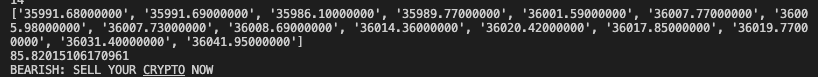

In [40]:
# rsi('btc', 15)

from IPython.display import Image
Image('RSI_demo.png')

### Historical Data

This function allows the user to observe the graphical behavior of a selected crypto in any historical timeframe. For example, the bitcoin 1h interval price from 2020/04/01 until 2020/05/01.

Note: The limit for possible values is 1000. For example:
1) if I want to get an hourly graph of bitcoin from 2020/01/01 to 2021/01/01 it won't be possible because (1h * 24h/day * 30days * 12 months) > 1000.   

2) If you want an hourly graph of bitcoin from 2020/April/01 to 2020/May/01, it is possible because (1h * 24h/day * 30days * 1month) < 1000.

In [49]:
import json
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

def historical(symbol, interval, startYear, startMonth, startDay, endYear, endMonth, endDay):
    global df

    url = 'https://api.binance.com/api/v3/klines'

    symbol = symbol.upper()
    startTime = str(int(dt.datetime(startYear,startMonth,startDay).timestamp() * 1000))
    endTime = str(int(dt.datetime(endYear,endMonth,endDay).timestamp() * 1000))
    limit = '1000'

    req_params = {'symbol': symbol + 'USDT', 'interval': interval, 'startTime': startTime, 
    'endTime': endTime, 'limit': limit}

    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))

    df = df.iloc[:, 0:6]

    df.columns =  ['datetime', 'open', 'high', 'low', 'close', 'volume']

    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
    df['close'] = df['close'].astype(float)
    df['close'].plot()
    plt.show()
    #return df

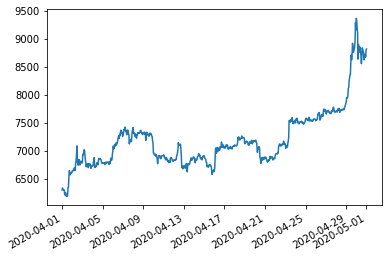

In [54]:
historical('btc', '1h', 2020,4,1,2020,5,1)

For more information on how to use the GUI, please visit the Crypto GUI vignette.